# Exploratory Data Analysis on the Automobile Data Set

In [2]:
# Importing the required packages here
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import missingno

In [3]:
# load the automobile dataset and create their dataframes
am_df = pd.read_csv('automobile.txt', sep=",", encoding='UTF-8')

# Data Cleaning

In [4]:
# Replace '?' with NaN so missing values are recognized
am_df = am_df.replace('?', np.nan)

In [5]:
# Lots of attributes are the wrong data type
print("Old data type list:")
print(am_df.dtypes)

# Correct these attributes to integers: normalized-losses, horsepower, peak-rpm, price
am_df[["normalized-losses", "horsepower", "peak-rpm", "price"]] = am_df[["normalized-losses", "horsepower", "peak-rpm", "price"]].apply(pd.to_numeric)

# Correct these attributes to floats: bore, stroke
am_df[["bore", "stroke"]] = am_df[["bore", "stroke"]].apply(pd.to_numeric)

print("\nNew data type list:")
print(am_df.convert_dtypes().dtypes)  

Old data type list:
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

New data type list:
symboling              Int64
normalized-losses      Int64
make                  string
fuel-type             string
aspiration            string
num-of-doors          string
body-style       

# Missing Data

In [6]:
# Check missing values
missing_values_count = am_df.isnull().sum()
missing_values_count

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

<AxesSubplot: >

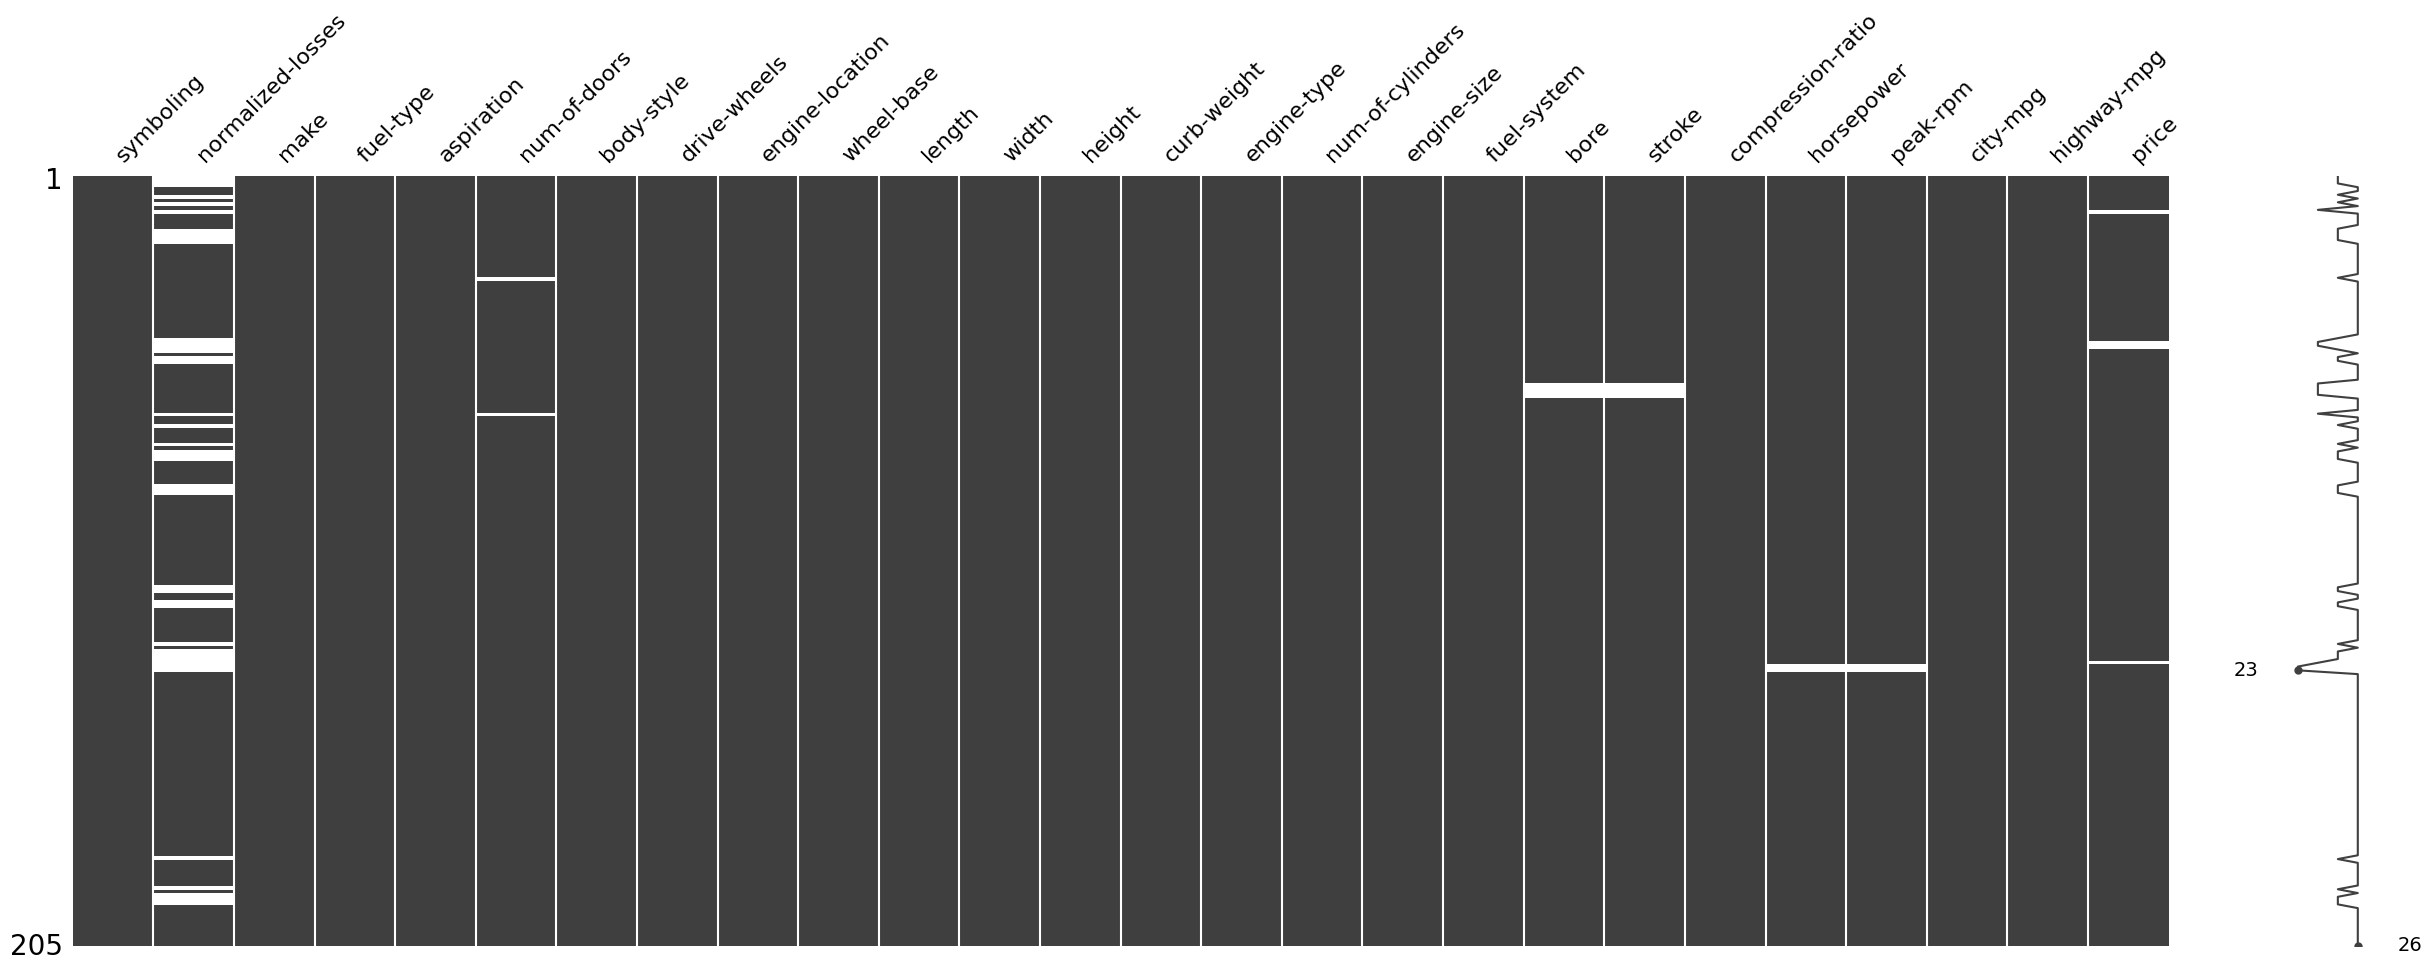

In [7]:
missingno.matrix(am_df, figsize = (30,10))

In [8]:
# Most of the missing values are in normalized-losses so I won't this attribute in the analysis
am_df = am_df.drop('normalized-losses', axis=1)

In [9]:
# Decided to drop the remaining rows with missing values
am_df = am_df.dropna()

# Data stories and Visualisations

#### What are the top 5 most expensive cars?

In [19]:
# What are the top 5 most expensive cars?
most_expensive_cars = am_df.sort_values('price', ascending=False)
most_expensive_cars_5 = most_expensive_cars.iloc[0:5,:]
most_expensive_cars_5

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
74,1,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,199.2,...,304,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,45400.0
16,0,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
73,0,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,208.1,...,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960.0
128,3,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,...,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,37028.0
17,0,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0


#### What type of drive wheels are the most fuel efficient in the city?

<AxesSubplot: xlabel='city-mpg', ylabel='Count'>

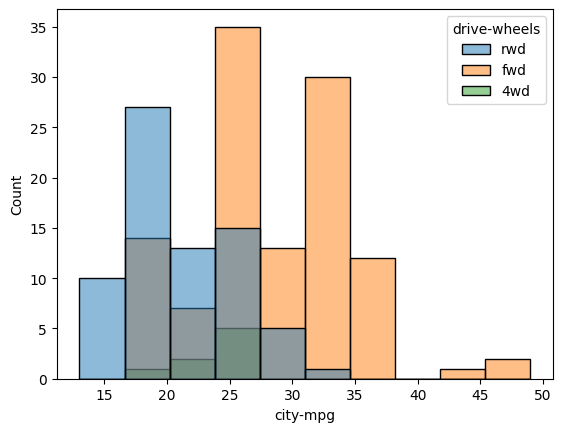

In [21]:
# What type of drive wheels are the most fuel efficient in the city?

sns.histplot(data=am_df, x="city-mpg", hue="drive-wheels")

# Forward drive is, on average, the most fuel efficient.

#### What are the top 5 heaviest cars?

In [25]:
# What are the top 5 heaviest cars?
heaviest_cars = am_df.sort_values('curb-weight', ascending=False)
heaviest_cars_5 = heaviest_cars.iloc[0:5,:]
heaviest_cars_5

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
48,0,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,35550.0
47,0,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,32250.0
49,0,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,...,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000.0
73,0,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,208.1,...,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960.0
70,-1,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600.0


#### What's the heaviest make on average?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'jaguar'),
  Text(1, 0, 'mercedes-benz'),
  Text(2, 0, 'peugot'),
  Text(3, 0, 'volvo'),
  Text(4, 0, 'bmw'),
  Text(5, 0, 'mercury'),
  Text(6, 0, 'porsche'),
  Text(7, 0, 'audi'),
  Text(8, 0, 'saab'),
  Text(9, 0, 'alfa-romero'),
  Text(10, 0, 'isuzu'),
  Text(11, 0, 'toyota'),
  Text(12, 0, 'nissan'),
  Text(13, 0, 'mitsubishi'),
  Text(14, 0, 'volkswagen'),
  Text(15, 0, 'subaru'),
  Text(16, 0, 'mazda'),
  Text(17, 0, 'plymouth'),
  Text(18, 0, 'dodge'),
  Text(19, 0, 'honda'),
  Text(20, 0, 'chevrolet')])

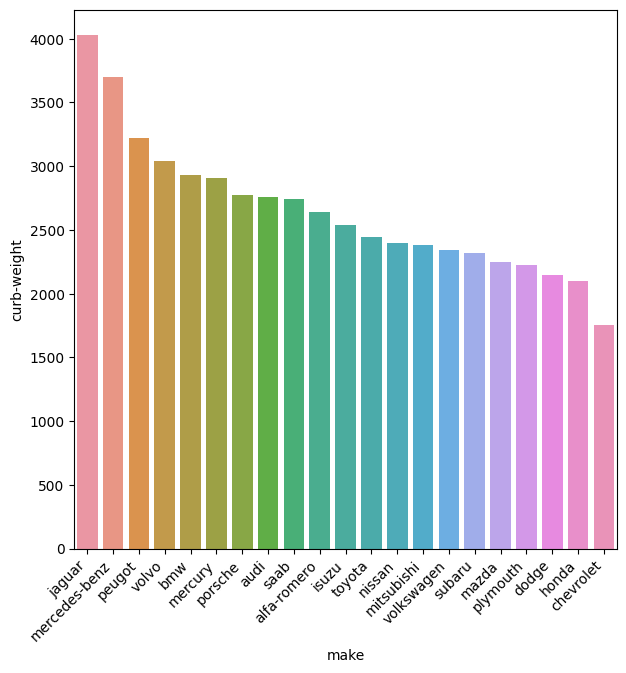

In [34]:
# What's the heaviest make on average?

makes_group = am_df.groupby('make', sort = False, as_index=False)['curb-weight'].mean()
makes_group_sorted = makes_group.sort_values('curb-weight', ascending=False)

plt.figure(figsize=(7,7))
sns.barplot(data=makes_group_sorted, x="make", y="curb-weight")
plt.xticks(rotation=45, horizontalalignment='right') 

# Jaguar's are, on average, the heaviest make.

#### Which fuel type has the bigger engine size?

(array([0, 1]), [Text(0, 0, 'diesel'), Text(1, 0, 'gas')])

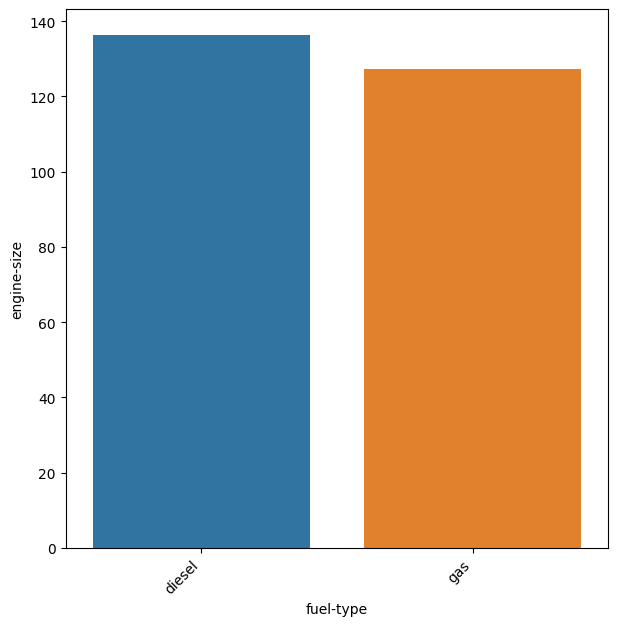

In [35]:
# Which fuel type has the bigger engine size?

fuel_group = am_df.groupby('fuel-type', sort = False, as_index=False)['engine-size'].mean()
fuel_group_sorted = fuel_group.sort_values('engine-size', ascending=False)

plt.figure(figsize=(7,7))
sns.barplot(data=fuel_group_sorted, x="fuel-type", y="engine-size")
plt.xticks(rotation=45, horizontalalignment='right') 

# Diesel engine's are, on average, bigger.